# [IAPR][iapr]: Project


**Group ID:** 02

**Author 1 (sciper):** Basile Spaenlehauer (272570)  
**Author 2 (sciper):** Victor Herrmann (284552)  
**Author 3 (sciper):** Abed Alrahman Shabaan (237731)  

**Release date:** 07.05.2021  
**Due date:** 03.06.2021 (23h59) 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

An anonymous researcher that we will name Lann Yecun is convinced that the MNIST dataset still has great potential. He decides to create a playing card game based on MNIST digits and different figures. The game uses a standard 52 card deck which is composed of four French suits/colours: clubs (&#9827;), diamonds (&#9830;), hearts (&#9829;) and spades (&#9824;). Each suit includes 10 digit cards (from 0 to 9) and 3 figures (Jack-J, Queen-Q, and King-K). Here is an example of the 13 spade cards with their name.


<img src="media/example_cards.png">


We can find the same arrangement of cards for the clubs, diamonds, and hearts. 


## 1. Rules


### 1.1 Standard

The rules are based on the simple battle card game. The goal of the game is to win as many points as possible. Each turn, the 4 players play a card in front of them. As displayed in the example below. The rules are the following:

- The cards are ranked in the following order : **0 < 1 < 2 < 3 < 4 < 5 < 6 < 7 < 8 < 9 < J < Q < K**.
- The player with the highest-ranked card wins the round and obtains **1 point**. 
- If the highest-ranked card is the same for multiple players we call it a draw and all winners get **1 points**. 
- In this configuration, we **do not** take into account the suits. The game only rely on the card ranks. 
- The game lasts 13 rounds. After the last round, the winner is the player that has the largest number of points. 
- In the example below Player 1 wins the round with his Queen ( 0 < 8 < J < **Q**).

If two or more players have the same number of points they share the victory.

### 1.2 Advanced

The advanced rules take into account the suits. 

- At the beginning of **each round** a random player is designated as the **dealer**. The dealer places a green token with the letter *D* next to him (player 1 in the example below).
- Only the cards that belong to the same suit as the one of the dealer are considered valid. In the example below, only Player 4 is competing with Player 1 as spade was selected by the dealer (e.i., Player 1). Player 2 and 3 are out for this round. Player 1 wins the round and **1 point** with the Queen ( 0&#9824; < **Q&#9824;**).
- There cannot be any draw between the players as they are not any card duplicates.
- We use the same system as the standard method to count the points.


### 1.3 Notes

- The orientation of the card is linked to the position of the player around the table. For instance, to read the card of the 3rd player you will have to rotate it by 180°.
- The **digits** always **face** the players around the table. The figures can have random orientations.
- Player 1 **always** seats south of the table. The players are **always** ordered counter-clockwise as in the example. 
- The dealers can change between the rounds and games.
- Some cards might apear multiple times per game.

<img src="media/example_round.jpg">


---
## 2. Data

You will be given the images of 7 games that were played ([download link](https://drive.google.com/file/d/1lsCMEwc00nsBMVrzo0NE1np79dMeShqZ/view?usp=sharing)). The data are composed of:
   - 7 folder named after the games (game1 to game7).
   - Each game includes 13 ordered images (1st to 13th round).
   - Each game includes a csv file with the ground truth of the game. The first row list the players (P1 to P4) as well as the dealer (D). The following rows represent the rounds (1 to 13). We represent the card played with 2 character as $AB$ where $A \in [0-9, J, Q, K]$ is the rank of the card and $B \in [C, D, H, S]$ is the suit. For example, QS means "(Q)ueen of (S)pade". The dealer is represented by the ID of the player (e.g. P1 -> 1).
   
You are free to use external datasets such as the original MNIST train set that you used in lab 3.

---
## 3. Your Tasks

Your task is to ready yourself for the final evaluation. The day of the exam we will give you a new folder with a new game. ! The digits on the cards might sligthly **differ** from the one of the traning set. When given a new data folder with 13 images your should be able to:

**Task 0**
   - Plot an overlay for each "round image" that shows your detections and classification. You can for example plot bounding boxes around the cards/dealer token and add a text overlay with the name of the classes.

**Task 1**
   - (a) Predict the **rank** of the card played by each player at each round (Standard rules).
   - (b) Predict the **number of points** of each player according to **Standard** rules
 
**Task 2**
   - (a) Detect which player is the selected **dealer** for each round.
   - (b) Predict the **rank** and the **suit** of the card played by each player at each round (Advanced rules).
   - (c) Predict the **number of points** of each player according to **Advanced** rules


You will have to upload your code on moodle **the day before** the exam.

We will ask you to run your pipeline in realtime and to send us your prediction of task 1 and 2 obtain with the function **print_results**. On our side we will compute the perfomance of your classification algorithm. To evaluate your method we will use the **evaluate_game** function presented below. To understant how the provided functions work please read the documentation of the functions in **utils.py**.

**Please make sure your function returns the proper data format to avoid points penalty the day of the exam**. 

### 3.1 Example Final results

Example of output you **should** provide the day of the final exam.

In [ ]:
from utils import print_results
import numpy as np

# Creates dummy predictions (toy exmaple)
pred_rank = np.array(["0D"]*4*13).reshape((13, 4)) # Everyone played the "0 of spade".
pred_dealer = [1]*13                # List of players selected as dealer for each round
pred_pts_stand = [0,0,0,13]         # Player 4 won 13 points with standard rules.
pred_pts_advan = [0,0,8,7]          # Player 3 and 4 won 8 and 7 points with adv, rules respectively.

print_results(
    rank_colour=pred_rank, 
    dealer=pred_dealer, 
    pts_standard=pred_pts_stand,
    pts_advanced=pred_pts_advan,
)

### 3.2 Example Accuracy

Example of code you can use to validate the performance of your model. Be careful the day of the exam you will not have access to the ground truth of the predictions.

In [ ]:
from utils import evaluate_game
import pandas as pd
#! You will need pandas libary to run the example. Please install the package using pip or conda commands !

# Load ground truth from game 1
cgt = pd.read_csv('train_games/game1/game1.csv', index_col=0)
cgt_rank = cgt[['P1', 'P2', 'P3', 'P4']].values

# Compute accuracy of prediction
acc_standard = evaluate_game(pred_rank, cgt_rank, mode_advanced=False)
acc_advanced = evaluate_game(pred_rank, cgt_rank, mode_advanced=True)
print("Your model accuracy is: Standard={:.3f}, Advanced={:.3f}".format(acc_standard, acc_advanced))

## 4. Solution

In [ ]:
import os
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage.filters import median, difference_of_gaussians
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_laplace
import time

# data_base_path = os.path.join('train_games')
data_base_path = 'train_games'
data_folder = 'game4'

# Load image
data_path = os.path.join(data_base_path, data_folder)
im_uint8 = skimage.io.imread(os.path.join(data_path, '8.jpg'))
im = im_uint8.astype('int')

In [ ]:
threshold2 = 30
threshold = 20

def detect_object_border(im, threshold):
    # apply green channel enhancement
    im_green = 2*im[:,:,1] - im[:,:,0] -im[:,:,2]
    im_green = im_green * (im_green > im_green.mean())
    
    start = time.time()
    im_filtered = difference_of_gaussians(im_green, 10)*10e10
    end = time.time()
    print(end - start)

    start = time.time()
    im_filtered = gaussian_laplace(im_green, 0.3)*(-1)
    print(im_filtered.max())
    im_filtered = im_filtered / im_filtered.max()
    im_filtered *= 255
    end = time.time()
    print(end - start)
    
    print(im_filtered.min())
    print(im_filtered.max())
    # threshold
    mask = (im_filtered > threshold)

    return mask, im_green, im_filtered

def detect_object_border2(im, threshold):
    # apply green channel enhancement
    im_green = 2*im[:,:,1] - im[:,:,0] -im[:,:,2]
    im_green = im_green * (im_green > im_green.mean())
    
    hp_filter = ((0, -1, 0), (-1, 5, -1), (0, -1, 0))
    
    im_filtered = convolve2d(im_green, hp_filter)
    
    # threshold
    mask = (im_filtered > threshold2)

    return mask, im_green, im_filtered

mask, im_green, filtered = detect_object_border(im, threshold)

print("LoG")
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(im_green, cmap='gray')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(filtered, cmap='gray')
plt.show()

plt.figure(figsize=(12, 12))
plt.imshow(mask, cmap='gray')
plt.title('Detected green features')
plt.show()

#print("Filter")
#mask, im_green, filtered = detect_object_border2(im, threshold)

#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
#ax.imshow(im_green, cmap='gray')
#plt.show()

#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
#ax.imshow(filtered, cmap='gray')
#plt.show()

#plt.figure(figsize=(12, 12))
#plt.imshow(mask, cmap='gray')
#plt.title('Detected green features')
#plt.show()

# TODO: display channels distinctively
plt.hist(im[...,0].flatten(), bins=256, color='r', alpha=0.5)
plt.hist(im[...,1].flatten(), bins=256, color='g', alpha=0.5)
plt.hist(im[...,2].flatten(), bins=256, color='b', alpha=0.5)
plt.title('Histogram of the base image (flattened)')
plt.show()

#im_green = 2*im[:,:,1] - im[:,:,0] -im[:,:,2]
plt.hist(filtered.flatten(), bins=256)
plt.axvline(threshold, c='r', label='threshold')
plt.title('Histogram of the "augmented" green channel (flattened)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 12))
plt.imshow(mask, cmap='gray')
plt.title('Detected green features')
plt.show()


from skimage.morphology import binary_closing, binary_opening, square, disk

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(mask, cmap='gray')
ax[0].set_title('Detected green features')

mask_closed = binary_closing(mask, selem=disk(20))
ax[1].imshow(mask_closed, cmap='gray')
ax[1].set_title('Detected green features (oppened and closed)')
plt.show()

In [ ]:
# Idea : disciminate the Dealer from the cards by using the number of pixels 
# the dealer will have a larger number of pixels than the other cards

# find the center of the rectangles by identifying them with region growing

from skimage.measure import label
from matplotlib.patches import Rectangle
import math

def dist_eucl(a, b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

# label items in image
im_label_mask, num_items = label(mask, return_num=True)

im_height, im_width = mask.shape
print(im_width, im_height)
player_pos = [(im_width//2, im_height),
             (im_width, im_height//2),
             (im_width//2, 0),
             (0, im_height//2)]

c_points_x = []
c_points_y = []
rects = []
retained_items = []
items = []
num_pixs = []
role = []
for i in range(num_items):
    pix_num = (im_label_mask==i+1).sum()
    if pix_num > 10000:
        # items that are big enough
        retained_items.append(i+1)
        num_pixs.append(pix_num)
        # coordinates of the points belonging to this item
        coords_item = np.where(im_label_mask==i+1)
        top = coords_item[0].min()
        right = coords_item[1].max()
        bot = coords_item[0].max()
        left = coords_item[1].min()
        # xy anchor for plt Rectangle patch 
        anchor = (left, top)
        width = right - left
        height = bot - top
        rect = (anchor, width, height)
        rects.append(rect)
        #  Center point of the item
        center_y, center_x = [a.mean() for a in coords_item]  # y, x
        c_points_x.append(center_x)
        c_points_y.append(center_y)
        center_point = (center_x, center_y)
        # decide which player it is
        player_num = np.argmin([(center_x-p[0])**2+(center_y-p[1])**2 for p in player_pos]) + 1
        player_num = np.argmin([dist_eucl((center_x, center_y), p) for p in player_pos]) + 1
        role.append(player_num)
        print(i+1, pix_num, center_point, rect, player_num)

# dealer is the larges number of pixels
print(num_pixs)
dealer_index = np.argmax(num_pixs)
dealer_player = role[dealer_index]
role[dealer_index] = 'D'
print(dealer_index)

# find other part of D
dealer_x = c_points_x[dealer_index]
dealer_y = c_points_y[dealer_index]
dist_to_D = [dist_eucl((a_x, a_y), (dealer_x, dealer_y)) if i != dealer_index else im_height for i, (a_x, a_y) in enumerate(zip(c_points_x, c_points_y)) ]
print(dist_to_D)
small_d_index = np.argmin(dist_to_D)
role[small_d_index] = 'd'

# merge the 'd' with the 'D'
item_small_d = retained_items[small_d_index]
item_big_D = retained_items[dealer_index]
print(item_small_d, '->', item_big_D)
im_label_mask[im_label_mask==item_small_d] = item_big_D
del rects[small_d_index]
del retained_items[small_d_index]
del role[small_d_index]
num_items -= 1

[print(a, b) for a, b in zip(retained_items, role)]

plt.figure(figsize=(12,12))
# plt.scatter(c_points_x, c_points_y)
for i, (idx, rect) in enumerate(zip(retained_items, rects)):
    rect_patch = Rectangle(*rect, fill=False, lw=2, ec='r')
    plt.gca().add_patch(rect_patch)
    anch = list(rect[0])
    anch[1] -= 50
    if role[i] == 'D':
        plt.annotate('Dealer', anch, c='r')
    else:
        plt.annotate(f'Player {role[i]}', anch, c='r')
# plt.imshow(~mask, cmap='gray')
plt.imshow(im, cmap='gray')
# plt.savefig('result.jpg')
plt.show()

print(f'Dealer player is {dealer_player}')
# plt.figure(figsize=(24,24))
# plt.imshow(items_labels!=6, cmap='gray')
# plt.title('Detected green features')
# plt.show()
print(num_items)

In [ ]:
for i in range(num_items):
    pix_num = (im_label_mask==i+1).sum()
    if pix_num > 10000:
        plt.figure(figsize=(12,12))
        plt.imshow(im_label_mask!=i+1, cmap='gray')
        plt.title(f'Item {i+1}')
        plt.show()

## Real start

### Import libraries

In [7]:
import os
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import vision_tools
from skimage.morphology import binary_closing, binary_opening, square, disk
from scipy.ndimage.morphology import binary_dilation
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_laplace
from skimage.exposure import equalize_hist
import importlib

### Import a test image

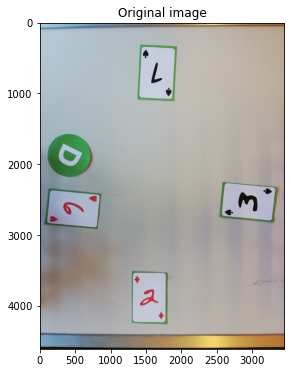

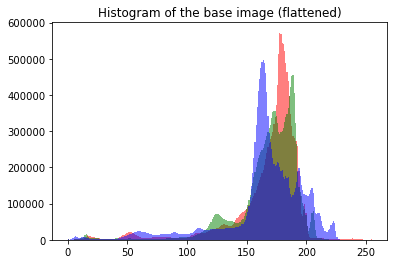

In [2]:
importlib.reload(vision_tools)
folder = 'train_games/game5'
file = '2.jpg'

# Load image
f_name = os.path.join(folder, file)
im_uint8 = skimage.io.imread(f_name)
im = im_uint8.astype('int')

# Display the image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(im)
plt.title('Original image')
plt.show()

# Display channels distinctively
plt.hist(im[...,0].flatten(), bins=256, color='r', alpha=0.5)
plt.hist(im[...,1].flatten(), bins=256, color='g', alpha=0.5)
plt.hist(im[...,2].flatten(), bins=256, color='b', alpha=0.5)
plt.title('Histogram of the base image (flattened)')
plt.show()

### Apply a filter to have only one channel

The objective is to separate the green of the border of the cards and the dealer of the other colors.

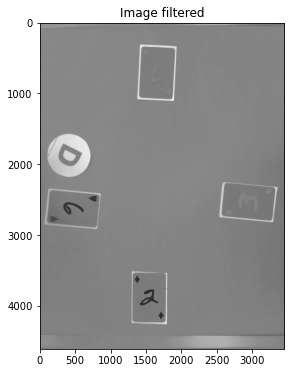

In [3]:
im_green = 2 * im[:, :, 1] - im[:, :, 0] - im[:, :, 2]

# Display the image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(im_green, cmap="gray")
plt.title('Image filtered')
plt.show()

### Create a mask to find the dealer

First, we apply a high pass filter to conserve only the border of the cards and the dealer. Then we apply a threshold and finally we apply a mask to remove the reflections on the top and the bottom of the image.

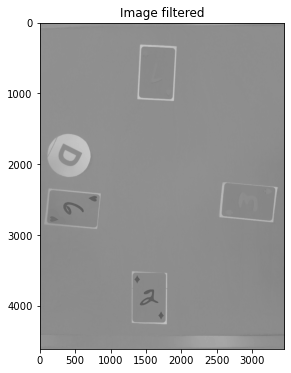

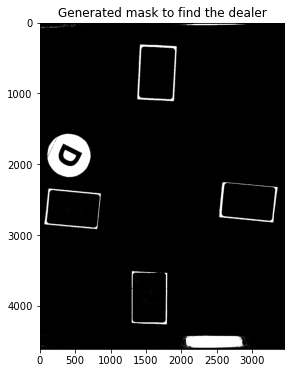

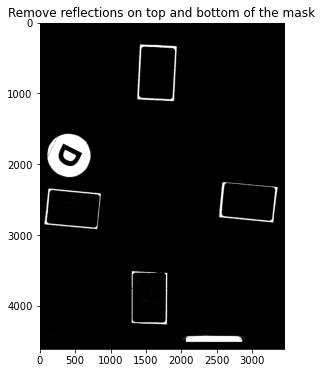

In [9]:
hp_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
im_filtered = convolve2d(im_green, hp_filter, mode='same')

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(im_filtered, cmap="gray")
plt.title('Image filtered')
plt.show()

# threshold
threshold = 40
dealer_mask = (im_filtered > threshold)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(dealer_mask, cmap="gray")
plt.title('Generated mask to find the dealer')
plt.show()

# dilation mask
EXCLUDE_MARGIN_TOP = 100
EXCLUDE_MARGIN_BOTTOM = 100
im_height, im_width = im.shape[:2]
dilation_mask = np.ones((im_height, im_width))
y_excl_bot = im_height - EXCLUDE_MARGIN_BOTTOM
y_excl_top = EXCLUDE_MARGIN_TOP
dilation_mask[y_excl_bot:, :] = 0
dilation_mask[:y_excl_top, :] = 0

dealer_mask = dealer_mask * dilation_mask

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(dealer_mask, cmap="gray")
plt.title('Remove reflections on top and bottom of the mask')
plt.show()

### Detection of the dealer

First we label all objects on the mask, then we find the biggest object (in number of pixels) and we assume that it is the dealer. Then, we compute the center of the dealer coin and find the closest player (represented by the red dots below). We export who is the dealer player and the position of the dealer coin to mask it after when we want to extract the cards.

In [13]:
def extract_rectangle(im_label_mask, retained_item):
    """
    Extract interesting object properties
    :param im_label_mask: image labels matrix
    :param retained_item: value of label for the object
    :param player_pos: list of player positions
    :param verbose: verbose mode
    :return:
    """
    # coordinates of the points belonging to this item
    coords_y, coords_x = np.where(im_label_mask == retained_item)
    top = coords_y.min()
    right = coords_x.max()
    bot = coords_y.max()
    left = coords_x.min()

    # xy anchor for plt Rectangle patch
    anchor = (left, top)
    width = right - left
    height = bot - top
    rect_plt = (anchor, width, height)
    return (top, right, bot, left), rect_plt

def dist_eucl(a, b):
    """
    Euclidean distance
    :param a: point a
    :param b: point b
    :return: euclidean distance between a and b
    """
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

Number of object: 2015
Dealer player is: player 2015


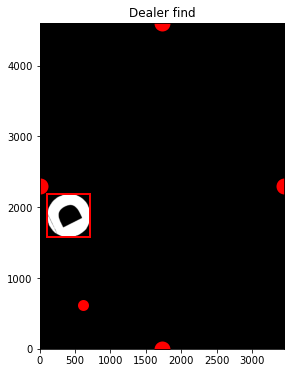

In [39]:
im_label_mask, num_items = label(dealer_mask, return_num=True)

print("Number of object:", num_items)

size_items = np.unique(im_label_mask, return_counts=True)

# remove background
size_items = np.delete(size_items, 0, axis=1)

dealer_index = size_items[0][np.argmax(size_items[1])]

rect = extract_rectangle(im_label_mask, dealer_index)
d_rect, plt_rect = rect
c_x = d_rect[1] - d_rect[3]
c_y = d_rect[2] - d_rect[0]

# define player positons on the center of each border
im_height, im_width = dealer_mask.shape

p_pos = [(im_width // 2, im_height),  # 1
         (im_width, im_height // 2),  # 2
         (im_width // 2, 0),  # 3
         (0, im_height // 2)]  # 4

dealer_num = np.argmin([dist_eucl((c_x, c_y), p) for p in p_pos]) + 1
print("Dealer player is: player", num_items)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow((im_label_mask == dealer_index), cmap="gray")
plt.title('Dealer find')
plt.scatter(c_x, c_y, color = "red", linewidths=5)
for i in range(4):
    plt.scatter(p_pos[i][0], p_pos[i][1], color = "red", linewidths=10)
plt.fill((d_rect[3],d_rect[1],d_rect[1],d_rect[3]),(d_rect[0],d_rect[0],d_rect[2],d_rect[2]), facecolor='none', edgecolor='red', linewidth=2)
plt.xlim((0,im_width))
plt.ylim((0,im_height))
plt.show()



## Real end

In [ ]:
importlib.reload(vision_tools)
root_folder = 'train_games/'
first = True
for f in [x for x in os.listdir(root_folder) if x.startswith('game')]:
    folder = root_folder + f
    for file in [x for x in os.listdir(folder) if x.endswith('.jpg')]:
        %time _ = vision_tools.card_pipeline(folder, file, verbose=False, plot=False)
        if first:
            first = False
            print('works')

#folder = 'train_games/game5'\n",
#file

[445043, 19068, 187868]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_1_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

works
[479301, 125984]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_10_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[497960, 131064]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_11_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[476476, 127127]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_12_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[497660, 30225, 180544]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_13_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[543090, 27360, 142659]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_2_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[532008, 28520, 151800]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_3_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[477001, 136350]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_4_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[497600, 32283, 138240]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_5_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[459837, 35639, 141885]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_6_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[484194, 22196, 170180]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_7_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[469448, 25102, 137157]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_8_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[480150, 26460, 127512]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game1_9_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[524566, 149028]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_1_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[480392, 141250]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_10_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[476130, 148082]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_11_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[564375, 161637]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_12_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[476476, 150400]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_13_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[471306, 24566, 167648]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_2_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[467566, 18340, 164096]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_3_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[490815, 134044]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_4_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[489558, 129774]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_5_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[562887, 136271]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_6_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[479200, 110313]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_7_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[556288, 144640]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_8_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[507791, 153600]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game2_9_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[479080, 14042, 132808]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_1_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[548856, 138557]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_10_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[481351, 130048]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_11_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[510951, 139872]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_12_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

KeyboardInterrupt: 

KeyboardInterrupt: 

[527289, 22275, 157896]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_3_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[446861, 144512]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_4_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[530012, 20874, 154880]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_5_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[610571, 180125]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_6_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[491855, 155448]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_7_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[468625, 130048]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_8_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[495010, 151326]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game3_9_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[574860, 139500]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game4_1_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[457002, 17199, 176859]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game4_10_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

[464112, 164667]


E:\EPFL\MA2\Image_analysis\Labs\iapr\project\vision_tools.py:300: UserWarning: results/masks/train_games_game4_11_p1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  skimage.io.imsave(f'results/masks/{file_name.split(".")[0]}_p{i + 1}.jpg',g_card < card_seg_thresh)


FileNotFoundError: The directory 'E:\\EPFL\\MA2\\Image_analysis\\Labs\\iapr\\project\\results\\masks' does not exist

KeyboardInterrupt: 

In [ ]:
# do not dilate pixels in the metal area
im_width, im_height = 3456, 4608
dilation_mask = np.ones((im_height, im_width))
dilation_mask[im_height-500:,:] = 0
dilation_mask[:100,:] = 0
folder = 'train_games/game4'
file = '8.jpg'
f_name = folder + '/' + file
im = vision_tools.load_img(folder, file)
im_green = vision_tools.filter_on_green(im)
mask_dealer = vision_tools.detect_object_border_dealer(im_green, threshold=40, plot=True)
# suppress reflection
mask_dealer = mask_dealer * dilation_mask
# detect dealer
print('detect dealer')
(top, right, bottom, left), dealer_num  = vision_tools.detect_dealer(mask_dealer)
print(dealer_num)
mask = vision_tools.detect_object_border(im_green, threshold=20, plot=True)
# suppress reflection
mask = mask * dilation_mask
# remove D
mask[top-1:bottom+1, left-1:right+1] = 0
mask = binary_dilation(mask, structure=disk(20))

# extract cards
cards = vision_tools.extract_cards(im, mask, f_name, card_seg_thresh=50, verbose=True, plot_cards=True)


In [ ]:
# im_green = im[:,:,1] - 0.5 * im[:,:,0] - 0.5 * im[:,:,2] + 128
# im_green = im_green.astype('int')
# print(im_green.min(), im_green.max())
# im_green = equalize_hist(im_green, 256) * 255
# print(im_green.min(), im_green.max())
# mask = im_green >= threshold
# mask = detect_object_border(im, threshold=100)
# mask = binary_dilation(mask, structure=disk(10))

plt.hist(im[...,0].flatten(), bins=256, color='r', alpha=0.5)
plt.hist(im[...,1].flatten(), bins=256, color='g', alpha=0.5)
plt.hist(im[...,2].flatten(), bins=256, color='b', alpha=0.5)
plt.title('Histogram of the base image (flattened)')
plt.show()


plt.hist(im_green.flatten(), bins=256)
plt.axvline(threshold, c='r', label='threshold')
plt.title(f'Histogram of the "augmented" green channel (flattened, th={threshold})')
plt.legend()
plt.show()

plt.figure(figsize=(12, 12))
plt.imshow(mask, cmap='gray')
plt.title('Detected green features')
plt.show()



In [ ]:
importlib.reload(vision_tools)

# do not dilate pixels in the metal area
im_width, im_height = 3456, 4608
dilation_mask = np.ones((im_height, im_width))
dilation_mask[im_height-500:,:] = 0
dilation_mask[:100,:] = 0

data_base_path = 'train_games'
for i in [2, 3, 4, 5, 6, 7]:
    data_folder = f'game{i}'
    # Load image
    data_path = os.path.join(data_base_path, data_folder)
    for r in range(1, 14):
        f_name = os.path.join(data_path, f'{r}.jpg')
        im_uint8 = skimage.io.imread(f_name)
        im = im_uint8.astype('int')
        mask = vision_tools.detect_object_border(im, threshold=80)
        # mask_opened = binary_closing(mask, selem=disk(10))
        mask = binary_dilation(mask, mask=dilation_mask, structure=disk(20))
        cards, dealer_player = vision_tools.extract_cards(im, mask, f_name, plot_card=True, verbose=False)




In [ ]:
def compute_pts(rank_colour, dealer):
    pts_standard = [0, 0, 0, 0]
    pts_advanced = [0, 0, 0, 0]
    
    for i in range(np.shape(rank_colour)[0]):
        curr_round_std = [0, 0, 0, 0]
        curr_round_adv = [0, 0, 0, 0]
        dealer_suit = rank_colour[i,dealer[i]-1][1]
        for j in range(np.shape(rank_colour)[1]):
            if rank_colour[i,j][0] == 'J':
                curr_round_std[j] = 10
                curr_round_adv[j] = 10
            elif rank_colour[i,j][0] == 'Q':
                curr_round_std[j] = 11
                curr_round_adv[j] = 11
            elif rank_colour[i,j][0] == 'K':
                curr_round_std[j] = 12
                curr_round_adv[j] = 12
            else:
                curr_round_std[j] = int(rank_colour[i,j][0])
                curr_round_adv[j] = int(rank_colour[i,j][0])
            if rank_colour[i,j][1] != dealer_suit:
                curr_round_adv[j] = -1
        for j in np.flatnonzero(curr_round_std == np.max(curr_round_std)).tolist():
            pts_standard[j] += 1
        pts_advanced[np.argmax(curr_round_adv)] += 1
    return pts_standard, pts_advanced


In [ ]:
a = np.array(["0D"]*4*13).reshape((13, 4))
a = np.array([["1D", "QC", "5S", "JD"],
             ["5S", "JS", "9C", "KD"],
             ["1D", "3H", "7C", "3D"],
             ["1S", "JD", "4S", "4C"],
             ["0D", "6S", "3C", "2C"],
             ["8S", "9D", "3S", "KS"],
             ["4D", "7H", "7D", "6H"],
             ["0C", "KC", "9S", "8C"],
             ["5D", "5H", "1H", "7S"],
             ["QH", "QC", "6D", "9H"],
             ["4H", "2D", "JC", "QD"],
             ["6C", "8D", "2H", "KH"],
             ["1C", "5C", "0H", "2S"]])

dealer = [1, 2, 3, 4, 2, 4, 1, 3, 3, 2, 1, 4, 4]

print(a)
print(compute_pts(a, dealer))

In [ ]:
# data_base_path = os.path.join('train_games')
data_base_path = 'train_games'
data_folder = 'game3'

for i in range(1,14):
    # Load image
    data_path = os.path.join(data_base_path, data_folder)
    im_uint8 = skimage.io.imread(os.path.join(data_path, str(i)+'.jpg'))
    im = im_uint8.astype('int')

    mask, im_green, im_med = detect_object_border(im, threshold)

    plt.figure(figsize=(12, 12))
    plt.imshow(mask, cmap='gray')
    plt.title('Detected green features')
    plt.show()

In [ ]:
im = skimage.io.imread('results/train_games_game1_1_p1.jpg')
h, w = im.shape[:2]
plt.imshow(im)
plt.show()

In [28]:
import CNN

importlib.reload(CNN)
model = CNN.train_new_classifier('./results/masks/', verbose=True, save=False)

Current device: cuda
Creating Tensors
Starting training
Epoch 0, loss = 4.602076530456543, symbol_acc = 0.11263736263736264, suit_acc = 0.22252747252747251
Epoch 1, loss = 4.252814292907715, symbol_acc = 0.1043956043956044, suit_acc = 0.2664835164835165
Epoch 2, loss = 3.3420913219451904, symbol_acc = 0.17857142857142858, suit_acc = 0.24725274725274726
Epoch 3, loss = 2.8399081230163574, symbol_acc = 0.25824175824175827, suit_acc = 0.36813186813186816
Epoch 4, loss = 4.391668796539307, symbol_acc = 0.28846153846153844, suit_acc = 0.37637362637362637
Epoch 5, loss = 3.277066230773926, symbol_acc = 0.18681318681318682, suit_acc = 0.3324175824175824
Epoch 6, loss = 3.045276165008545, symbol_acc = 0.3131868131868132, suit_acc = 0.3516483516483517
Epoch 7, loss = 4.179022789001465, symbol_acc = 0.22802197802197802, suit_acc = 0.3489010989010989
Epoch 8, loss = 3.396817684173584, symbol_acc = 0.20604395604395603, suit_acc = 0.29945054945054944
Epoch 9, loss = 3.6500487327575684, symbol_acc =

In [30]:
import torch
torch.save(model.state_dict(), './classifier.torch')